# STEPS WE NEED TO DO :
####IMPORTING NECESSARY LIBRARIES
####LOADING THE DATA SET
####DATA CLEANING
####EXPLORATORY DATA ANALYSIS
####DATA VISUALISATION

# IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# LOADING THE DATASET

In [2]:
df = pd.read_csv("netflix1.csv")

In [3]:
df.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.shape

(8790, 10)

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

# HANDLING MISSING VALUES
###### Data cleaning involves handling the inconsistencies , errors and missing values in data umprove its quality and reliability for analysis
### STRATEGIES FOR HANDLING MISSING VALUES:
###### 1) IMPUTATION : Replacing missing value with the estimated value like mean median and mode
2) REMOVAL : If the data has a high percentage of missing value it is often suggested to remove the column as this may mislead the result.

3) KEEPING: Sometimes  the column might found to be very necessary then it is better to keep it as it as we can not work on it on the basis of imputation

In [8]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [9]:
nan_count = df.isnull().sum().sum()
none_count = df.applymap(lambda x: x is None).sum().sum()

print(f"Total NaN count: {nan_count}")
print(f"Total None count: {none_count}")

Total NaN count: 0
Total None count: 0


###### CONVERTING THE COLUMNS TO THE UPPER CASE

In [10]:
df.columns = df.columns.str.upper()

In [11]:
df.head()

,SHOW_ID,TYPE,TITLE,DIRECTOR,COUNTRY,DATE_ADDED,RELEASE_YEAR,RATING,DURATION,LISTED_IN
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


#### REMOVING DUPLICATES
###### Duplicated data unnecessarily occupies the storage to reduce the storage and improve the performance it is better to remove the duplicate. The average value will be biased to the duplicated values

In [12]:
duplicate_value = df.drop_duplicates(inplace=True)

In [13]:
duplicate_value

In [14]:
num_duplicates = df.duplicated().sum()
num_duplicates

np.int64(0)

In [15]:
df.dtypes

,0
SHOW_ID,object
TYPE,object
TITLE,object
DIRECTOR,object
COUNTRY,object
DATE_ADDED,object
RELEASE_YEAR,int64
RATING,object
DURATION,object
LISTED_IN,object


In [16]:
df['DATE_ADDED'] = pd.to_datetime(df["DATE_ADDED"])

In [17]:
df["RELEASE_YEAR"] = pd.to_datetime(df["RELEASE_YEAR"])

In [18]:
df.dtypes

,0
SHOW_ID,object
TYPE,object
TITLE,object
DIRECTOR,object
COUNTRY,object
DATE_ADDED,datetime64[ns]
RELEASE_YEAR,datetime64[ns]
RATING,object
DURATION,object
LISTED_IN,object


In [19]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(num_cols)

[]


In [20]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
print(cat_cols)

['SHOW_ID', 'TYPE', 'TITLE', 'DIRECTOR', 'COUNTRY', 'RATING', 'DURATION', 'LISTED_IN']


In [21]:
type_counts = df["TYPE"].value_counts()

In [22]:
type_counts

,count
TYPE,
Movie,6126
TV Show,2664


In [23]:
movie_proportions = type_counts["Movie"]/len(df)
show_proportions = type_counts["TV Show"]/len(df)

# ANALYSING AND VISUALISATION


### PROPORTIONS OF MOVIES to  TV SHOWS

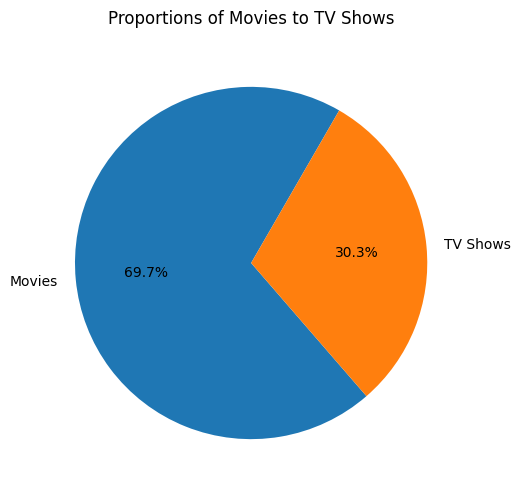

In [24]:
plt.figure(figsize=(5,6))
labels = ["Movies", "TV Shows"]
sizes = [movie_proportions , show_proportions]
plt.pie(sizes , labels=labels, autopct= "%.1f%%", startangle=60)
plt.title("Proportions of Movies to TV Shows")
plt.axis("equal")
plt.show()

### TOP 10 COUNTRIES WITH MORE CONTENT THIS CAN BE DONE BY PLOTTING A BAR PLOT


In [25]:
top_country = df.groupby("COUNTRY").size().reset_index(name = "COUNT")

In [26]:

top_country

,COUNTRY,COUNT
0,Argentina,76
1,Australia,114
2,Austria,9
3,Bangladesh,3
4,Belarus,1
...,...,...
81,Uruguay,9
82,Venezuela,2
83,Vietnam,7
84,West Germany,1


In [27]:
top_countries = top_country.nlargest(10,"COUNT")

In [28]:
top_countries

,COUNTRY,COUNT
80,United States,3240
29,India,1057
79,United Kingdom,638
52,Pakistan,421
51,Not Given,287
10,Canada,271
36,Japan,259
68,South Korea,214
20,France,213
70,Spain,182


<Figure size 1000x600 with 0 Axes>

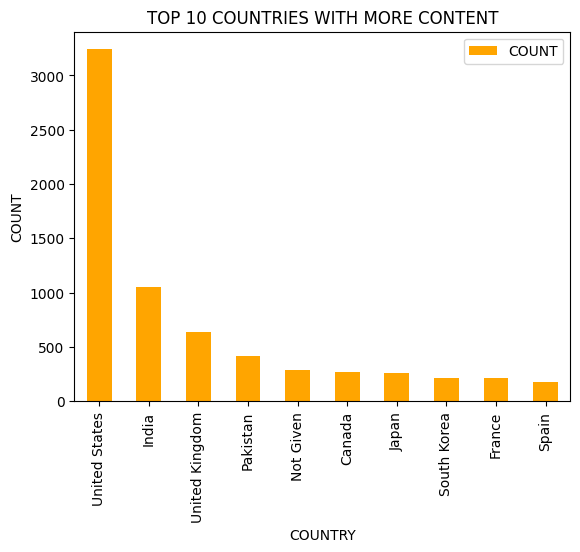

In [94]:
plt.figure(figsize=(10,6))
top_countries.plot(kind= "bar", x="COUNTRY", y="COUNT",color="orange")
plt.title("TOP 10 COUNTRIES WITH MORE CONTENT")
plt.xlabel("COUNTRY")
plt.ylabel("COUNT")
plt.xticks(rotation=90)
plt.show()

### NUMBER OF TITLES ADDED OVER THE YEARS

In [30]:
titles_per_year = df.groupby(df["DATE_ADDED"].dt.year)['SHOW_ID'].count()

In [31]:
titles_per_year

,SHOW_ID
DATE_ADDED,
2008,2
2009,2
2010,1
2011,13
2012,3
2013,11
2014,24
2015,82
2016,426


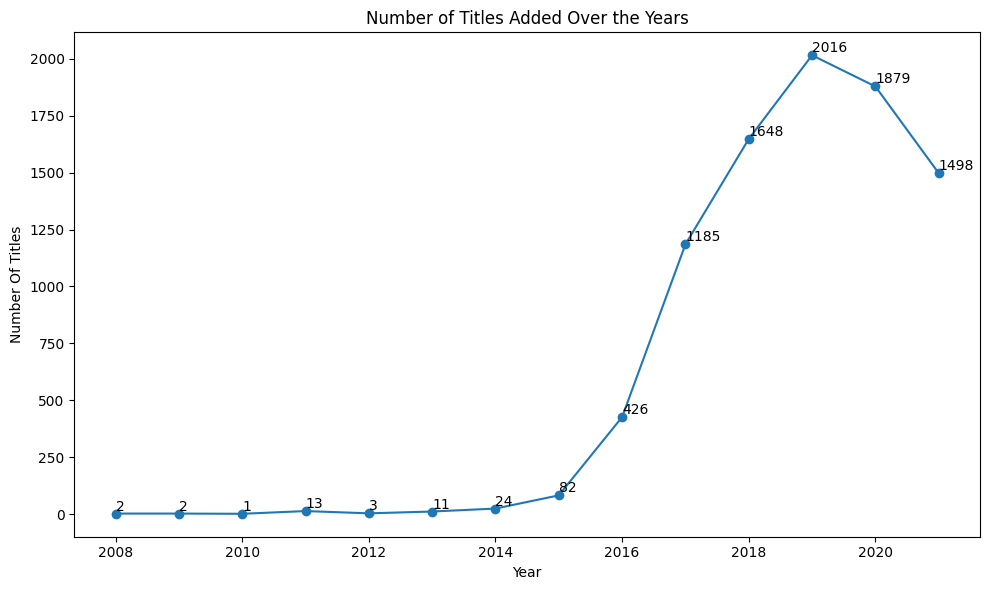

In [32]:
plt.figure(figsize=(10,6))
plt.plot(titles_per_year.index, titles_per_year.values, marker = 'o')
plt.title("Number of Titles Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number Of Titles")
for x,y in zip(titles_per_year.index, titles_per_year.values):
    plt.text(x,y,str(y),  va="bottom")
plt.tight_layout()
plt.show()

### RATING COUNT


In [33]:
rating_count = df["RATING"].value_counts().reset_index(name="COUNT")


In [34]:
rating_count

,RATING,COUNT
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


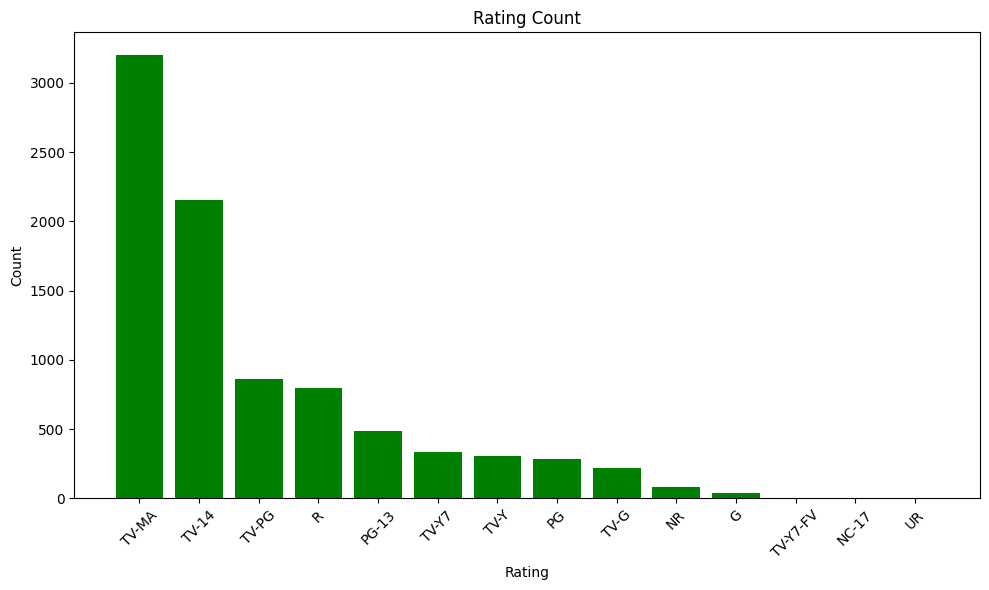

In [35]:
plt.figure(figsize=(10,6))
plt.bar(rating_count["RATING"], rating_count["COUNT"], color="green")
plt.title("Rating Count")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analyzing Genre Popularity ON Netflix

In [36]:
genre_count = df["LISTED_IN"].value_counts().reset_index(name="COUNT")


In [37]:
genre_count

,LISTED_IN,COUNT
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252
...,...,...
508,"TV Action & Adventure, TV Comedies",1
509,"Romantic TV Shows, Spanish-Language TV Shows, ...",1
510,"Classic & Cult TV, Kids' TV, Spanish-Language ...",1
511,"Anime Series, Crime TV Shows, TV Thrillers",1


In [38]:
top_liked_genres = genre_count.nlargest(10,"COUNT")
top_liked_genres

,LISTED_IN,COUNT
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252
5,Kids' TV,219
6,Children & Family Movies,215
7,"Children & Family Movies, Comedies",201
8,"Documentaries, International Movies",186
9,"Dramas, International Movies, Romantic Movies",180


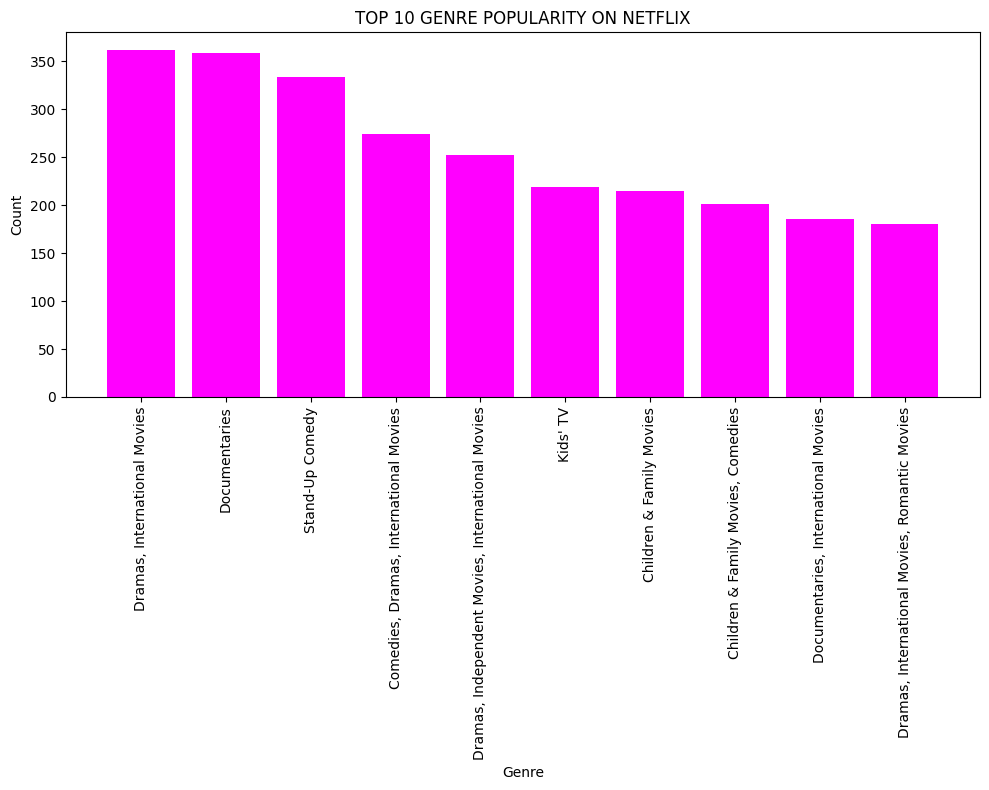

In [39]:
plt.figure(figsize = (10,8))
plt.bar(top_liked_genres["LISTED_IN"], top_liked_genres["COUNT"], color = "magenta")
plt.title("TOP 10 GENRE POPULARITY ON NETFLIX")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [40]:
director_counts = df['DIRECTOR'].value_counts().dropna()
director_counts

,count
DIRECTOR,
Not Given,2588
Rajiv Chilaka,20
Alastair Fothergill,18
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
...,...
Mark Risley,1
Kirati Nakintanon,1
Christian De Vita,1


In [41]:
df.head()

,SHOW_ID,TYPE,TITLE,DIRECTOR,COUNTRY,DATE_ADDED,RELEASE_YEAR,RATING,DURATION,LISTED_IN
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,1970-01-01 00:00:00.000002020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,1970-01-01 00:00:00.000002021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1970-01-01 00:00:00.000001993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [42]:
type_by_year = df.groupby([df["DATE_ADDED"].dt.year , "TYPE"])["SHOW_ID"].count().reset_index()

In [43]:
type_by_year

,DATE_ADDED,TYPE,SHOW_ID
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


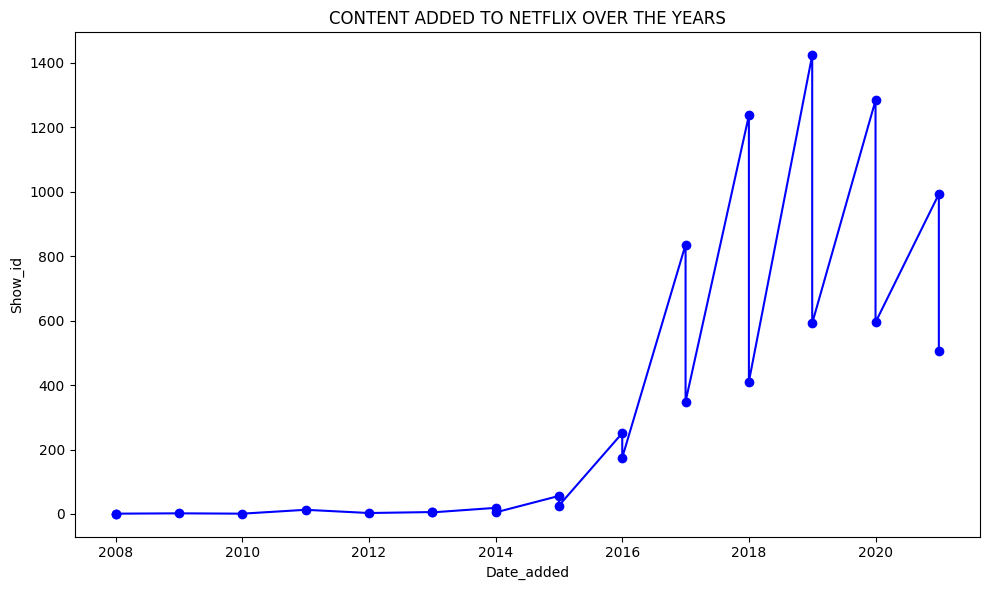

In [44]:
plt.figure(figsize = (10,6))
plt.plot( type_by_year["DATE_ADDED"] , type_by_year["SHOW_ID"], color = "blue", marker = "o") #removed second type_by_year and corrected color input
plt.title("CONTENT ADDED TO NETFLIX OVER THE YEARS")
plt.xlabel("Date_added")
plt.ylabel("Show_id")
plt.tight_layout()
plt.show()


# INSIGHTS